# Machine learning - Predictive analysis tutorial (Classification)

## Introduction

### "The computer is incredibly _accurate_, _fast_ and _stupid_. Humans are _inaccurate_, _slow_ and _intelligent_. Together, they are powerful beyond imagination". - Albert Einstein

In today's world, machine learning and artificial intelligence are everwhere. They are a testament to progress in mathematics and computer science, and support humanity in their effort to make computers less _stupid_. As students of AS and A level computer science, it is important that we keep up this spirit by exploring an application of machine learning. 


### General overview of machine learning 
Machine learning is a branch of AI that enables computers to learn from data and use learnings to make predictions on unseen examples. Machine learning is of two broad types: 
- Supervised machine learning: Regression and classification. The training data has *ground truth labels*, like what we will see today.
- Unsupervised machine learning: Anomaly detection, clustering, Recommender systems, reinforcement learning etc: The data is **unlabelled**. I'll save this for some other day.

![image.png](https://www.researchgate.net/publication/374041654/figure/fig1/AS:11431281190172024@1695218349295/Flowchart-representing-the-various-types-of-machine-learning.png)


## Supervised learning - Classification algorithms 
- Classification is one of the most widely used types of machine learning because of its applicability.
- We can use it to detect crop diseases, ripened fruits, and even diabetes!
- I'll be showing you how to build, train and evaluate a **binary classification** model to detect diabetes with a dataset. This is a shorter and simpler version of the model described here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10378239

Feature variables:

0. Pregnancies
1. Glucose
2. Blood pressure
3. Skin thickness
4. Insulin
5. BMI
6. Diabetes pedigree function
7. Age

Target variables: 
1. Outcome (TRUE//1 for TYPE II POSITIVE, FALSE//0 for TYPE II NEGATIVE)

#### Remember the order of these features as our array structures depend on these. 

## List of contents: 
1. Installing and importing required libraries
2. Data preprocessing using pandas
3. Data visualisation using matplotlib
4. Training the model
5. Evaluating the trained model
6. Making predictions with the model
7. The math behind *binary classification*.

## Loading the libraries

In [74]:
# Use the exclamation mark to run bash commands on colab/jupyter. 
!pip install scikit-learn
!pip install pandas 
!pip install matplotlib 
!pip install numpy

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
# from google.colab import files # This is not needed on your local machine

## Data preprocessing using pandas 


In [23]:
# Note the variables used along with their features
filepath = "diabetes.csv"
dataFrame = pd.read_csv(filepath)

print("This is a brief overview of data: ")
print(dataFrame.info())
print("__________________________________________________________________")
print(f"\nThis is a sample of the data: {dataFrame.head()}")

This is a brief overview of data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
__________________________________________________________________

This is a sample of the data:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148       

In [33]:
# We need to split the data into a training set and an evaluation set using df.sample, which will randomly draw rows from the database. 
# The notation below is very important. 
# Note that I have not used a cross validation set nor normalisation, but they are important in machine learning projects. 
# I have only ommitted them to minimise the complexity of the model. 

mtotal = len(dataFrame)
splitFrac = 0.30 # Commonly used ratio in the industry - the proportion of data for testing. 
numberOfFeatures = 8 

testDataFrame = dataFrame.sample(frac=splitFrac, random_state = 43)
trainDataFrame = dataFrame.drop(testDataFrame.index)
mtest = len(testDataFrame)
mtrain = len(trainDataFrame)


print(f"I have {mtrain} training examples. Below is the metadata of the training set:\n")
trainDataFrame.info()


print(f"\n\nI have {mtest} testing examples. Below is the metadata of the testing set: \n")
testDataFrame.info()

I have 538 training examples. Below is the metadata of the training set:

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               538 non-null    int64  
 1   Glucose                   538 non-null    int64  
 2   BloodPressure             538 non-null    int64  
 3   SkinThickness             538 non-null    int64  
 4   Insulin                   538 non-null    int64  
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  538 non-null    float64
 7   Age                       538 non-null    int64  
 8   Outcome                   538 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.0 KB


I have 230 testing examples. Below is the metadata of the testing set: 

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 557 to 530
Data columns (total 9 colum

In [41]:
# Next, we need to store all of the fields in numpy arrays.  
# For the FEATURES (X), We will have a 1D array for pregnancies, one for glucose, etc... This produces 8 1D arrays of length mtrain or mtest. 
# When we combine these, we will have a 2D array of shape (mtrain/mtest, numberOfFeatures). --> just like a database!
# For the TARGET (Y), we should have an array of shape (mtrain/mtest, ), not (mtrain/mtest, 1). It should be a flat 1D array. 

featureAttrib = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
targetAttrib = ['Outcome']
# This syntax is used to store the values in numpyArrays

Xtrain = trainDataFrame[featureAttrib].values
Xtest = testDataFrame[featureAttrib].values
Ytrain = trainDataFrame[targetAttrib].values.reshape(-1)
Ytest = testDataFrame[targetAttrib].values.reshape(-1)

print(f"The shape of Xtrain is {Xtrain.shape} and the shape of Xtest is {Xtest.shape}")
print(f"The shape of Ytrain is {Ytrain.shape} and the shape of Ytest is {Ytest.shape}")


The shape of Xtrain is (538, 8) and the shape of Xtest is (230, 8)
The shape of Ytrain is (538,) and the shape of Ytest is (230,)


## Data Visualisation
A good practice in machine learning is to conduct **visual inspections** of your training data. 


<BarContainer object of 2 artists>

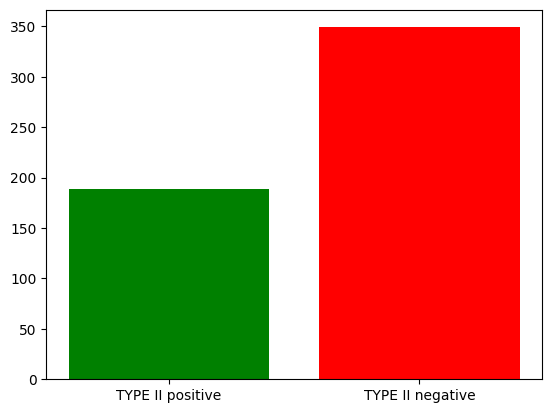

In [45]:
# Barplot of TYPE II positive and TYPE II Negative
def generateCounts():
    counts = np.zeros(2) # [Number of positive examples, Number of negative examples]
    for x in Ytrain: 
        if x == 1:
            counts[0] += 1
        else: 
            counts[1] += 1
    return counts 
categories = ['TYPE II positive', 'TYPE II negative'] 
counts = generateCounts()
plt.bar(categories, counts, color=['green', 'red'])

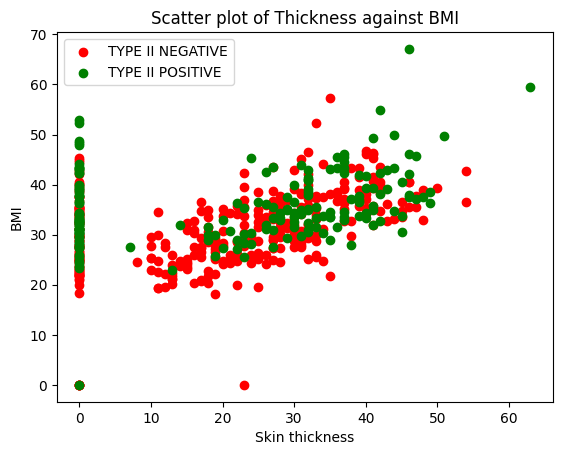

In [48]:
# Scatterplot of Skin thickness (3) vs BMI (5). 
# We need to use array indexing: array[:, n] will extract the nth column from a 2D array into a 1D array of shape (mtrain) 
# Also note the use of np.where. It will fetch all the indices with a given condition; just like a DML query in SQL. 

skinThickness = Xtrain[:, 3]
BMI = Xtrain[:, 5]
positiveIndices = np.where(Ytrain == 1)
negativeIndices = np.where(Ytrain == 0)

plt.scatter(skinThickness[negativeIndices], BMI[negativeIndices], color='Red', label='TYPE II NEGATIVE')
plt.scatter(skinThickness[positiveIndices], BMI[positiveIndices], color='Green', label='TYPE II POSITIVE')
plt.xlabel('Skin thickness')
plt.ylabel('BMI')
plt.title('Scatter plot of Thickness against BMI')
plt.legend(); plt.show()

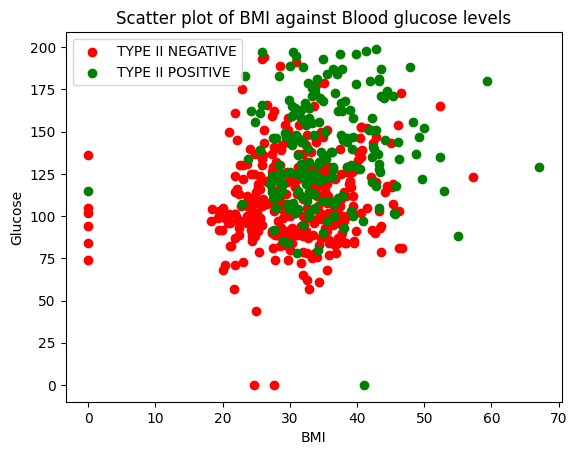

In [50]:
# BMI (5) against Glucose (1). 
# We will carry forward the indices from the previous code block. 

glucose = Xtrain[:, 1]
BMI = Xtrain[:, 5]
plt.scatter(BMI[negativeIndices], glucose[negativeIndices], color='Red', label='TYPE II NEGATIVE')
plt.scatter(BMI[positiveIndices], glucose[positiveIndices], color='Green', label='TYPE II POSITIVE')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Scatter plot of BMI against Blood glucose levels')
plt.legend(); plt.show()

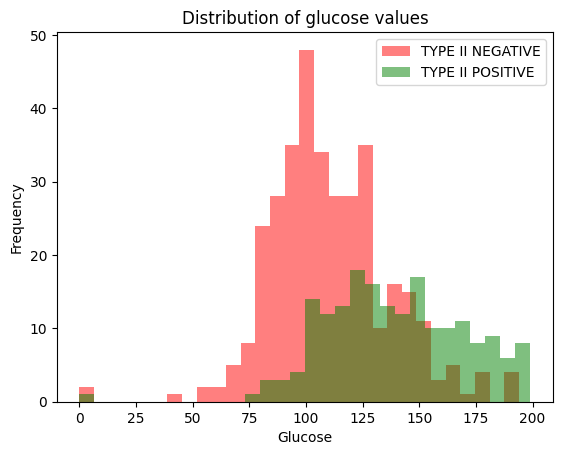

In [51]:
# Histogram of Blood glucose
glucose = Xtrain[:, 1]
plt.hist(glucose[negativeIndices], color='Red', label='TYPE II NEGATIVE', bins = 30, alpha=0.5)
plt.hist(glucose[positveIndices], color='green', label='TYPE II POSITIVE', bins = 30, alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of glucose values')
plt.legend()
plt.show()


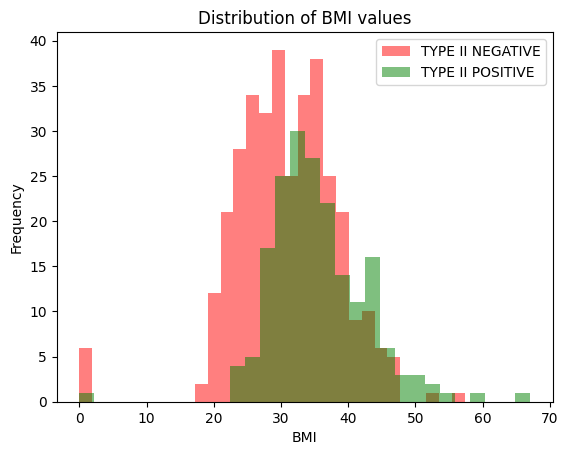

In [55]:
# Histogram of BMI
BMI = Xtrain[:, 5]
plt.hist(BMI[negativeIndices], color='Red', label='TYPE II NEGATIVE', bins = 30, alpha=0.5)
plt.hist(BMI[positveIndices], color='green', label='TYPE II POSITIVE', bins = 30, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI values')
plt.legend()
plt.show()

# Note that the alpha parameter is used to make the histogram transparent to view the other color bars. 

This is just a small fraction of the possible plots. We can combine all the possible plots into a single embedding, as follows. 
![image.png](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10378239/bin/diagnostics-13-02383-g004.jpg)


# Training the model

Scikit Learn is a powerful library that can train the binary classifier. We need to use a simple method - the fit method() using our arrays from before. 
This is where the shapes of the arrays become very important. The model uses something called vectorisation and carries out matrix multiplication for prediction and training. We need the right shape for the matrix to enable this. 

In [72]:
# Instantiate a model of type LogisticRegression as imported from above. 
myModel = LogisticRegression(max_iter = 1000)
myModel.fit(Xtrain, Ytrain)

modelParams = {
    'weights': myModel.coef_, # This returns a 2D array of size(numberOfFeatures, 1) so we have to access the 0th index for the first row
    'bias': myModel.intercept_ # This returns a 1D array with the bias value in it, so we have to access the first element with [0].
}

# Note that the array obtained as weights is ordered and corresponds to the feature numbers stated previously. 

print(f"Trained model results:\nWeights array: {modelParams.get('weights')}\nBias: {modelParams.get('bias')}")

for attrib, weight in zip(featureAttrib, modelParams.get('weights')[0]): 
    print(f"The weight on {attrib} is {weight}")

Trained model results:
Weights array: [[ 1.19323631e-01  3.26866019e-02 -1.62881146e-02 -2.17013637e-04
  -1.10747003e-03  8.79242487e-02  1.42187231e+00  1.27196745e-02]]
Bias: [-7.96412985]
The weight on Pregnancies is 0.11932363108128409
The weight on Glucose is 0.03268660185504205
The weight on BloodPressure is -0.01628811461604985
The weight on SkinThickness is -0.00021701363696055923
The weight on Insulin is -0.0011074700261277542
The weight on BMI is 0.08792424866560725
The weight on DiabetesPedigreeFunction is 1.4218723097951838
The weight on Age is 0.012719674544010481


## Evaluating the trained model with scores 
Once we train the model, the story does not end there. It is imperative that the performance of the model is evaluated on the following **metrics**. 
These are the metrics that I computed: 

1. Accuracy score - The percentage of correctly classified examples in the testing set.
2. Confusion matrix - It computes a matrix of table of values that take the following format:
![image.png](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816)

3. Precision - Out of those predicted positive, what is the fraction of people who actually had diabetes?
4. Recall (sensitivity) - Out of those who actually had diabetes, what is the fraction that was predicted positive?
5. F1 Score - This combines precision and recall into one single score using a **harmonic average**.

Once we obtain these scores, we can carry out tasks to improve the performance of the model. These tasks are called **feature engineering** where we manipulate the features by for instance taking a logarithm, raising to some power. We might also gather more data in some cases, although we can't do that here right now. 

In [76]:
# Finding the scores for the model 
# from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

modelScores = {}

YPred = myModel.predict(Xtest) # Predicted values of Y to be compared with Ytest, the actual values from the testing set. 

modelScores['accuracy_score'] = accuracy_score(Ytest, YPred)
modelScores['precision_score'] = precision_score(Ytest, YPred)
modelScores['recall_score'] = recall_score(Ytest, YPred)
modelScores['f1_score'] = f1_score(Ytest, YPred)


# Ignore the dictionary syntax for now: It isn't important. Focus on the right hand side: the syntax for calculating the scores. 

for keys in modelScores: 
    print(f"{keys}: {modelScores.get(keys)}")

accuracy_score: 0.8043478260869565
precision_score: 0.8148148148148148
recall_score: 0.5569620253164557
f1_score: 0.6616541353383458


### Okay! That is pretty good. Now lets look at the confusion matrix and verify that the scores are correct with the previous definitions of the scores themselves. 

In [79]:
print(f"The confusion matrix:\n {confusion_matrix(Ytest, YPred)}")

The confusion matrix:
 [[141  10]
 [ 35  44]]


Match this with the format above. Here are the formulae for finding precision and recall. 

- Precision = True Positives/(True positives + false positives) 
- Recall = Predicted positive/(True positives + false negatives) 

Where: True positives + false positives = Total positives AND True Positives + False Negatives = Actually positive

Be **VERY SURE** that you are able to relate these formulae to the defenitions. 

- F1 Score = (2 * precision * recall)/(precision + recall)




## Examples of making predictions

Use the model to predict if this person is diabetic or not. 

- Pregnancies = 2 
- Glucose = 140 
- Blood Pressure = 125 
- Skin thickness = 51
- Insulin = 450 
- BMI = 27
- Diabetes pedigree function = 0.67
- Age = 35



In [84]:
candidate = np.array([[2, 140, 125, 51, 450, 27, 0.67, 35]]) 
print(myModel.predict(candidate))
# Note the shape of the array: VERY IMPORTANT. Just like before, it is a 2D array with (mtrain, 1). Here since we have one person, it is (1, 1). 

[0]


## Some math behind logistic regression

- For supervised learning models, the model itself is made up of parameters from which a math equation is used to calculate the predictions.

- The parameters are:
1. Weights (denoted w) - For each feature, there is a corresponding weight variable.
2. Bias (denoted b) - Think of this as a Y intercept. It is just a free flowing number that can be adjusted to get accurate predictions.

The Bias is a **SCALAR VALUE**, meaning a single number. The weights are **VECTORS OF NUMBERS (mathematical way of saying numpy array)**. It is a vector because it contains numberOfFeature number of values.


In essence, a weight is a scalar. But we can combine all the weights for all the features into a vector which makes it faster due to vectorisation in numpy discussed earlier.


This is the equation used to calculate the output of the model when all weights are represented as scalars. We will call it z. 

$$z(\overrightarrow{\mathbf{x}}, w1, w2, ...., b ) = w_1 x_1 + w_2 x_2 + \ldots + w_{\text{numberOfFeatures}}  x_{\text{numberOfFeatures}}
$$
### Notice that X is a vector (of numberOfFeatures numbers as well: one for glucose, one for BMI, etc. until all the features are covered)

When we combine even the weights into a vector, the equation is much simpler now.

$$z(\overrightarrow{\mathbf{x}}, \overrightarrow{\mathbf{w}}, b) = \overrightarrow{\mathbf{w}} \cdot \overrightarrow{\mathbf{x}} + b$$

This notation here is called the **DOT PRODUCT**. We multiply the first element in W with the first element in B + second element in W with second element in B... and so on until all features have been covered.



$$\overrightarrow{\mathbf{x}} = \begin{bmatrix}
    pregnancies \\
    glucose \\
    \vdots \\
    age 
\end{bmatrix}
$$

THIS VECTOR IS THE FEATURE VECTOR; THE VECTOR FOR A **PARTICULAR PERSON**. 

$$\overrightarrow{\mathbf{w}} = \begin{bmatrix}
    pregnancies\textunderscore weight \\
    glucose \textunderscore weight \\
    \vdots \\
    age \textunderscore weight
\end{bmatrix}
$$

So overall, we can summarise the **dot product** as follows: 

$$ \overrightarrow{\mathbf{w}} \cdot \overrightarrow{\mathbf{x}} = pregnancies * pregnancies \textunderscore weight + glucose * glucose \textunderscore weight + ...... + age * age \textunderscore weight$$

After looking at this, if you compare the first formula for Z (weights as scalars) and second formula for z (weights as a vector), you can see that both are equivalent ways of writing the same thing. The second method is preffered because that is what scikit-learn is actually doing: it is doing a dot product on the two vectors: np.dot(x, w) if you remember from the numpy tutorial. 

However, one more question to address is the fact that we want a discrete value. 
$$z(\overrightarrow{\mathbf{x}}, \overrightarrow{\mathbf{w}}, b) = \overrightarrow{\mathbf{w}} \cdot \overrightarrow{\mathbf{x}} + b$$. From this, z can be any number. -10000, 69, 880. ANY NUMBER. How do we use this to predict a 0 or a 1? We use an **activation function**. 

### AN ACTIVATION FUNCTION TAKES THE Z VALUE AS AN INPUT AND OUTPUTS A VALUE THAT WE CAN MAP TO A 0 OR 1. 
For binary classification, we can use the sigmoid function: $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![image.png](https://raw.githubusercontent.com/Codecademy/docs/main/media/sigmoid-function.png)



Look! The sigmoid function is **ALWAYS** between zero and one. In fact, it touches neither 0 nor 1. It continues on getting ever closer to it until infinity but never touches it. You might know this from math as an **asymptote**. 

With this tool, we can define a new variable **a** (activation) which is computed as follows. 

$$ a = \sigma(z) = \sigma(\overrightarrow{\mathbf{w}} \cdot \overrightarrow{\mathbf{x}} + b) $$

The activation, a is the probability that the person has diabetes GIVEN the features of the input and the parameters of the model. You might remember the conditional probability notation from statistics. 

$$ P(y = 1 | \overrightarrow{\mathbf{w}} \\\ and \\\ \overrightarrow{\mathbf{x}} \\\ and \\\ b) = \sigma(z) = \sigma(\overrightarrow{\mathbf{w}} \cdot \overrightarrow{\mathbf{x}} + b) $$

When we train the model, we are finding the optimal values of the model **parameters** w and b to maximise the number of correct predictions over the training set. We then carry forward these **parameters** to make predictions like explained above. Training a machine learning model deserves its own jupyter notebook, to be honest, so I will end it here. I strongly urge you to explore further using the following resources: 

- TensorFlow Tutorials
- Scikit-Learn Documentation
- Kaggle
- Fast.ai
- Towards Data Science on Medium
- Machine Learning Mastery
- Stanford Machine Learning - Coursera
- Deep Learning Specialization - Coursera
- DataCamp - Introduction to Machine Learning with Python

## Thank you!
Hayagreev Jeyandran, AS(B). 